In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time 

In [2]:
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc, cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [3]:
df = pd.read_excel('NAFLD.xlsx')
print('The dimension of the dataset is: {}'.format(df.shape))

The dimension of the dataset is: (605, 62)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 62 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    int64  
 1   Age                                                                                          605 non-null    int64  
 2   Gender (Female=1, Male=2)                                                                    605 non-null    int64  
 3   Height                                                                                       605 non-null    int64  
 4   Weight                                                                                       605 non-null    int64  
 5   Body Mass Index                     

In [5]:
df.head()

Patient No.  Age  Gender (Female=1, Male=2)  Height  Weight  \
0            1   60                          1     150      80   
1            2   55                          1     154      73   
2            3   53                          2     170     101   
3            4   33                          2     175      95   
4            5   23                          2     162      68   

   Body Mass Index  Waist Circumference  Hip Circumference  \
0            35.56                119.0              104.0   
1            30.78                101.0               98.0   
2            34.95                116.0              112.0   
3            31.02                114.0              114.0   
4            25.91                101.0               97.0   

   Systolic Blood Pressure  Diastolic Blood Pressure  ...  Activity  Fibrosis  \
0                      135                        77  ...         2         1   
1                      120                        72  ...         2         0   
2                      120                        80  ...         2         3   
3                      124                        83  ...         2         1   
4                      124                        79  ...         2         0   

   NAS score according to Kleiner  \
0                               4   
1                               4   
2                               4   
3                               4   
4                               4   

   NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)  \
0                                                  1                                
1                                                  1                                
2                                                  1                                
3                                                  1                                
4                                                  1                                

   Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)  \
0                                                  1                         
1                                                  0                         
2                                                  1                         
3                                                  1                         
4                                                  0                         

   Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)  \
0                                                  0                                             
1                                                  0                                             
2                                                  1                                             
3                                                  0                                             
4                                                  0                                             

   Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)  \
0                                                  0                                          
1                                                  0                                          
2                                                  1                                          
3                                                  0                                          
4                                                  0                                          

   Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                     

In [6]:
df.shape

(605, 62)

In [7]:
col = df.columns
col

Index(['Patient No.', 'Age', 'Gender (Female=1, Male=2)', 'Height', 'Weight',
       'Body Mass Index', 'Waist Circumference', 'Hip Circumference',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Diyabetes Mellitus (No=0, Yes=1)', 'Hypertension (No=0, Yes=1)',
       'Hyperlipidemia (No=0, Yes=1)', 'Metabolic syndrome (No=0, Yes=1)',
       'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)', 'AST',
       'ALT', 'ALP', 'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Microalbumin Spot Urine', 'Microalbumin/Creatinine Ratio',
       'TSH', 'CK', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'PT', 'INR',
       'Vitamin D', 'Ferritin', 'Ceruloplasmin', 'C Peptide', 'Glucose',
       'Insulin', 'HOMA',
       'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)',
       'U

In [8]:
def get_class_distribution(df):
    class_distributions = {}
    
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            class_counts = df[column].value_counts()
            
            if len(class_counts) <= 10: 
                class_distributions[column] = {
                    "class_counts": class_counts,
                    "num_classes": class_counts.count(),
                    "class_names": class_counts.index.tolist()
                }
    
    return class_distributions

class_distributions = get_class_distribution(df)

for column, distribution in class_distributions.items():
    print(f"Sütun: {column}")
    print(f"Sınıf Sayısı: {distribution['num_classes']}")
    print(f"Sınıf İsimleri: {distribution['class_names']}")
    print(f"Her Sınıfa Düşen Örnek Sayısı:\n{distribution['class_counts']}\n")

Sütun: Gender (Female=1, Male=2)
Sınıf Sayısı: 2
Sınıf İsimleri: [2, 1]
Her Sınıfa Düşen Örnek Sayısı:
Gender (Female=1, Male=2)
2    321
1    284
Name: count, dtype: int64

Sütun: Diyabetes Mellitus (No=0, Yes=1)
Sınıf Sayısı: 2
Sınıf İsimleri: [0, 1]
Her Sınıfa Düşen Örnek Sayısı:
Diyabetes Mellitus (No=0, Yes=1)
0    380
1    225
Name: count, dtype: int64

Sütun: Hypertension (No=0, Yes=1)
Sınıf Sayısı: 2
Sınıf İsimleri: [0, 1]
Her Sınıfa Düşen Örnek Sayısı:
Hypertension (No=0, Yes=1)
0    391
1    214
Name: count, dtype: int64

Sütun: Hyperlipidemia (No=0, Yes=1)
Sınıf Sayısı: 2
Sınıf İsimleri: [1, 0]
Her Sınıfa Düşen Örnek Sayısı:
Hyperlipidemia (No=0, Yes=1)
1    351
0    254
Name: count, dtype: int64

Sütun: Metabolic syndrome (No=0, Yes=1)
Sınıf Sayısı: 2
Sınıf İsimleri: [1, 0]
Her Sınıfa Düşen Örnek Sayısı:
Metabolic syndrome (No=0, Yes=1)
1    392
0    213
Name: count, dtype: int64

Sütun: Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)
Sınıf Sayısı: 3
Sınıf İsimle

In [9]:
y = df['Diagnosis according to SAF (NASH=1, NAFL=2)']

list = ['Patient No.','Diagnosis according to SAF (NASH=1, NAFL=2)']

x = df.drop(list, axis = 1)

In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis according to SAF (NASH=1, NAFL=2), dtype: int64

In [11]:
x.head()

Age  Gender (Female=1, Male=2)  Height  Weight  Body Mass Index  \
0   60                          1     150      80            35.56   
1   55                          1     154      73            30.78   
2   53                          2     170     101            34.95   
3   33                          2     175      95            31.02   
4   23                          2     162      68            25.91   

   Waist Circumference  Hip Circumference  Systolic Blood Pressure  \
0                119.0              104.0                      135   
1                101.0               98.0                      120   
2                116.0              112.0                      120   
3                114.0              114.0                      124   
4                101.0               97.0                      124   

   Diastolic Blood Pressure  Diyabetes Mellitus (No=0, Yes=1)  ...  Steatosis  \
0                        77                                 0  ...          2   
1                        72                                 0  ...          2   
2                        80                                 1  ...          2   
3                        83                                 1  ...          2   
4                        79                                 0  ...          2   

   Activity  Fibrosis  NAS score according to Kleiner  \
0         2         1                               4   
1         2         0                               4   
2         2         3                               4   
3         2         1                               4   
4         2         0                               4   

   NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)  \
0                                                  1                                
1                                                  1                                
2                                                  1                                
3                                                  1                                
4                                                  1                                

   Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)  \
0                                                  1                         
1                                                  0                         
2                                                  1                         
3                                                  1                         
4                                                  0                         

   Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)  \
0                                                  0                                             
1                                                  0                                             
2                                                  1                                             
3                                                  0                                             
4                                                  0                                             

   Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)  \
0                                                  0                                          
1                                                  0                                          
2                                                  1                                          
3                                                  0                                          
4                                                  0                                          

   Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)  \
0                                                  0                
1                                                  0 

In [12]:
x.describe()

Age  Gender (Female=1, Male=2)      Height      Weight  \
count  605.000000                 605.000000  605.000000  605.000000   
mean    46.302479                   1.530579  164.790083   86.403306   
std     10.646148                   0.499477    9.920240   14.379183   
min     18.000000                   1.000000  135.000000   48.000000   
25%     38.000000                   1.000000  157.000000   78.000000   
50%     47.000000                   2.000000  165.000000   85.000000   
75%     54.000000                   2.000000  172.000000   94.000000   
max     71.000000                   2.000000  193.000000  158.000000   

       Body Mass Index  Waist Circumference  Hip Circumference  \
count       605.000000           576.000000         598.000000   
mean         31.868711           109.440972         104.306020   
std           5.106853            10.588755          10.385775   
min          18.290000            63.000000          70.000000   
25%          28.610000           102.000000          98.000000   
50%          31.210000           108.000000         104.000000   
75%          34.520000           115.000000         110.000000   
max          56.000000           155.000000         147.000000   

       Systolic Blood Pressure  Diastolic Blood Pressure  \
count               605.000000                605.000000   
mean                127.276033                 82.423140   
std                  15.314631                  9.941857   
min                  90.000000                 51.000000   
25%                 120.000000                 80.000000   
50%                 121.000000                 80.000000   
75%                 135.000000                 90.000000   
max                 190.000000                120.000000   

       Diyabetes Mellitus (No=0, Yes=1)  ...   Steatosis    Activity  \
count                        605.000000  ...  605.000000  605.000000   
mean                           0.371901  ...    2.094215    2.884298   
std                            0.483712  ...    0.765166    1.042079   
min                            0.000000  ...    1.000000    0.000000   
25%                            0.000000  ...    2.000000    2.000000   
50%                            0.000000  ...    2.000000    3.000000   
75%                            1.000000  ...    3.000000    4.000000   
max                            1.000000  ...    3.000000    4.000000   

         Fibrosis  NAS score according to Kleiner  \
count  605.000000                      605.000000   
mean     1.256198                        5.082645   
std      1.164663                        1.597736   
min      0.000000                        1.000000   
25%      0.000000                        4.000000   
50%      1.000000                        5.000000   
75%      2.000000                        6.000000   
max      4.000000                        8.000000   

       NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)  \
count                                          605.00000                                
mean                                             0.71405                                
std                                              0.45224                                
min                                              0.00000                                
25%                                              0.00000                                
50%                                              1.00000                                
75%                                              1.00000                                
max                                              1.00000                                

       Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)  \
count                                         605.000000                         
mean                                            0.676033                         
std                                             0.4683

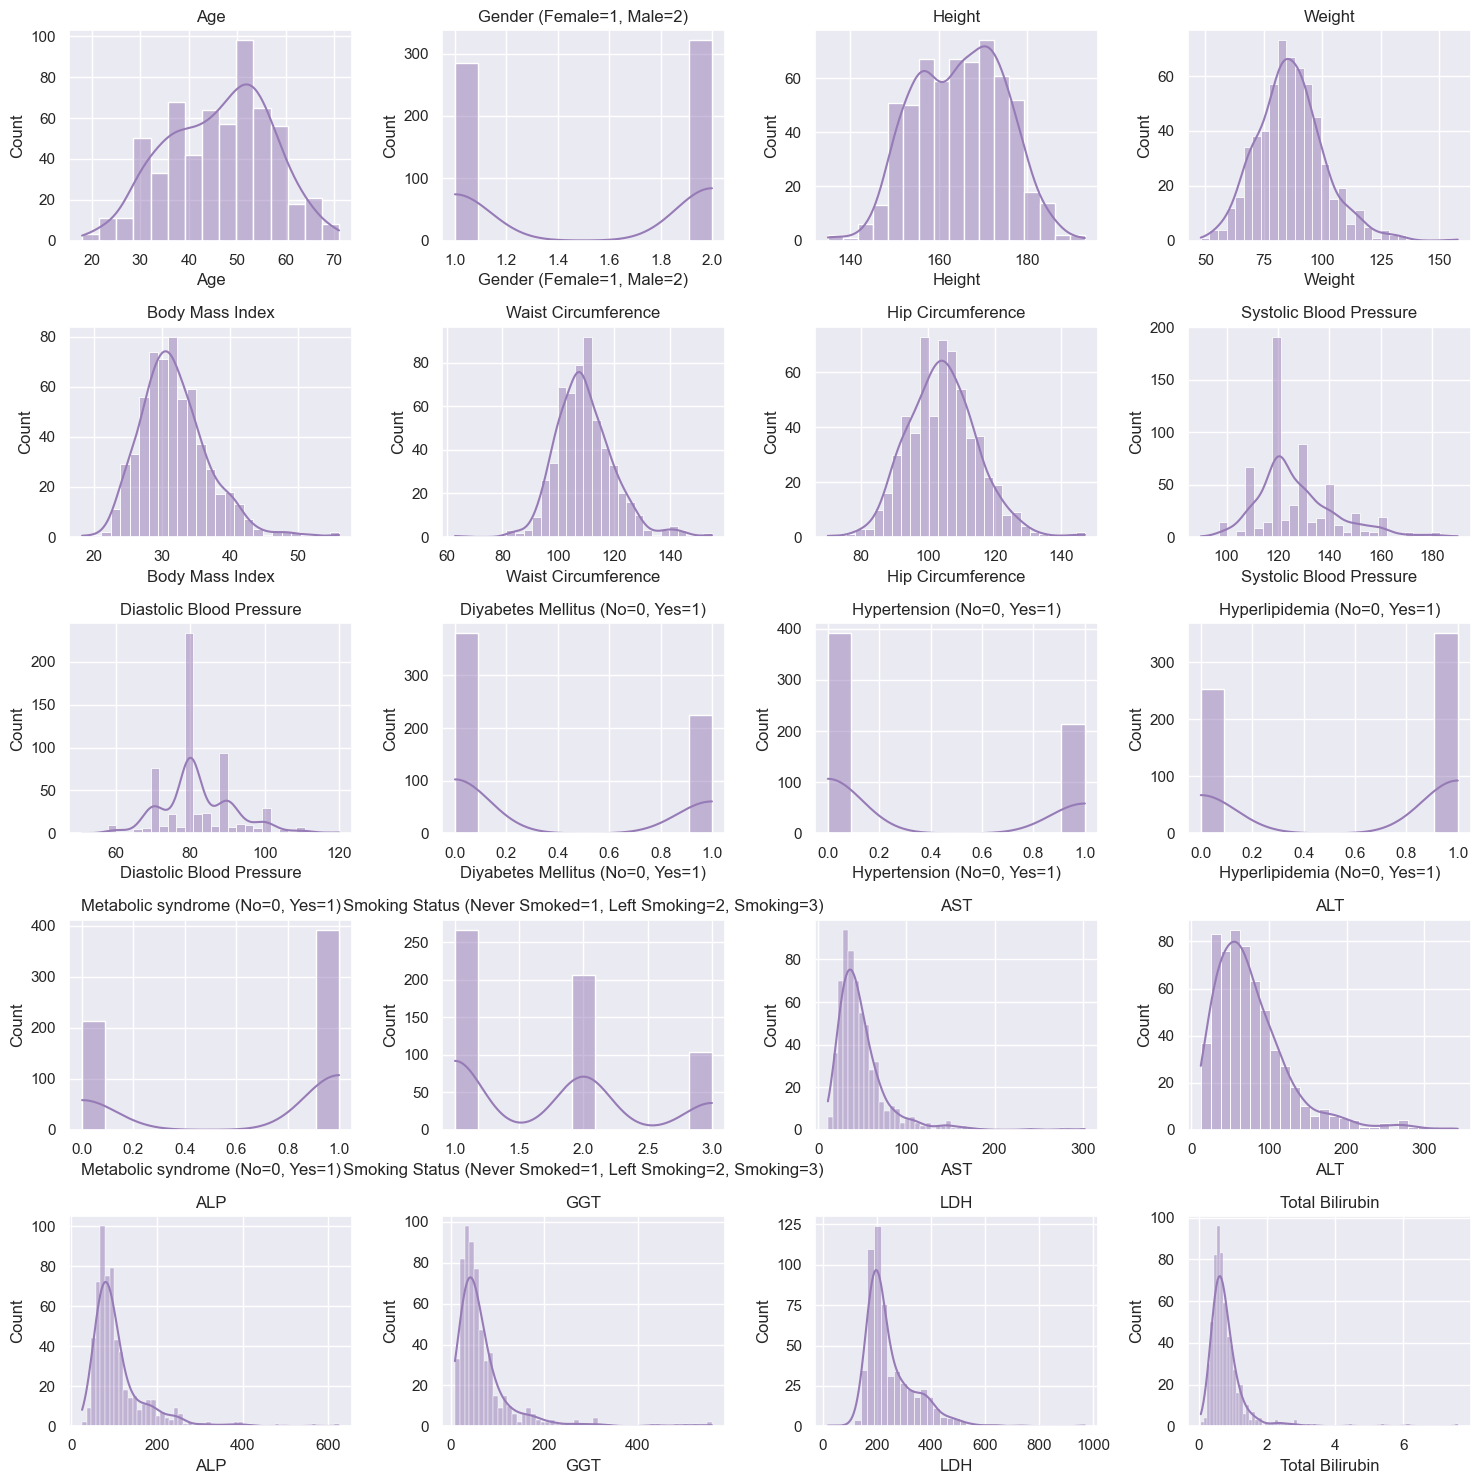

In [13]:
sns.set_theme()

numeric_columns = x.select_dtypes(include=[np.number]).columns

fig = plt.figure(figsize=(15, 15))

max_plots = 20

for index, column in enumerate(numeric_columns[:max_plots]):
    plt.subplot(5, 4, index + 1)  
    sns.histplot(x=x.loc[:, column], color='#967bb6', kde=True) 
    plt.title(column, size=12)
    plt.grid(True)

fig.tight_layout()
plt.show()


Count NASH :  537
Count NAFL :  68


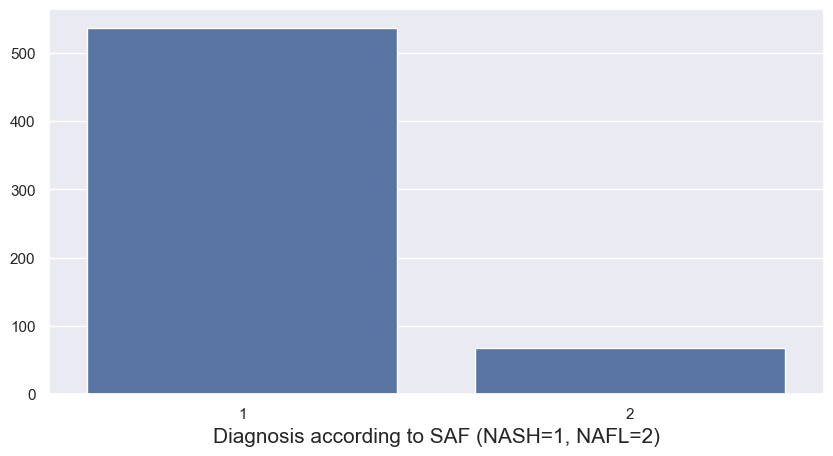

In [14]:
NASH , NAFL = y.value_counts()
print('Count NASH : ' , NASH)
print('Count NAFL : ' , NAFL)

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df.groupby('Diagnosis according to SAF (NASH=1, NAFL=2)').count().index,
                 y=df.groupby('Diagnosis according to SAF (NASH=1, NAFL=2)').count().iloc[:,0])

ax.set_xlabel('Diagnosis according to SAF (NASH=1, NAFL=2)', fontsize=15)
ax.set_ylabel('')


plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender (Female=1, Male=2)'),
  Text(2, 0, 'Height'),
  Text(3, 0, 'Weight'),
  Text(4, 0, 'Body Mass Index'),
  Text(5, 0, 'Waist Circumference'),
  Text(6, 0, 'Hip Circumference'),
  Text(7, 0, 'Systolic Blood Pressure'),
  Text(8, 0, 'Diastolic Blood Pressure'),
  Text(9, 0, 'Diyabetes Mellitus (No=0, Yes=1)')])

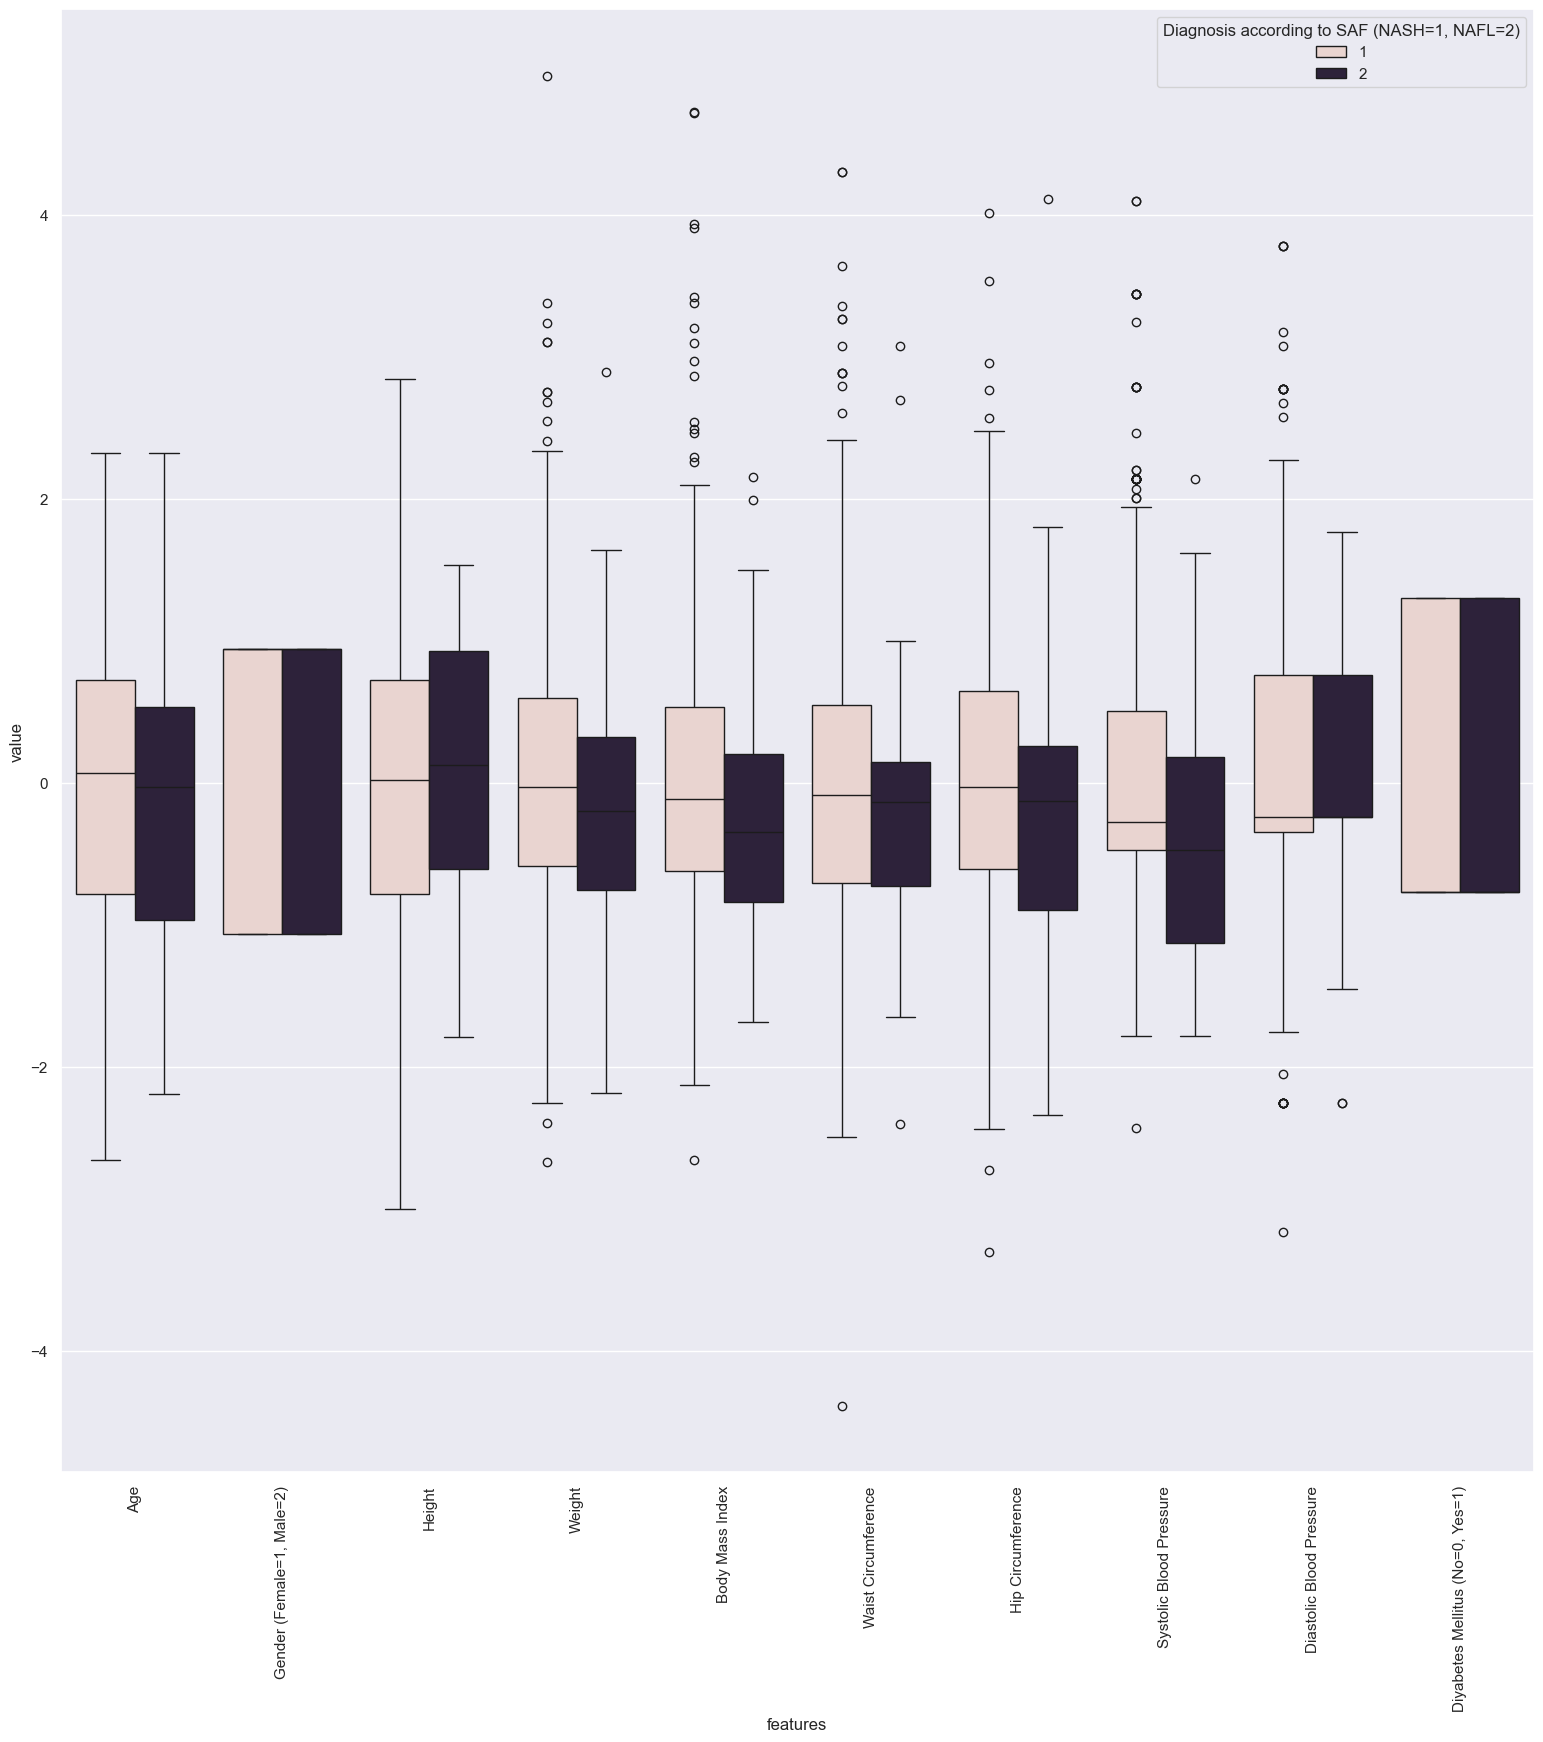

In [15]:
df_dia = y
df = x
df_n_2 = (df - df.mean()) / (df.std())
df = pd.concat([y,df_n_2.iloc[:,0:10]],axis=1)
df = pd.melt(df,id_vars = 'Diagnosis according to SAF (NASH=1, NAFL=2)',
                var_name = 'features',
                value_name = 'value')
plt.figure(figsize=(19,19))
sns.boxplot(x='features', y='value', hue='Diagnosis according to SAF (NASH=1, NAFL=2)',data=df)
plt.xticks(rotation=90)

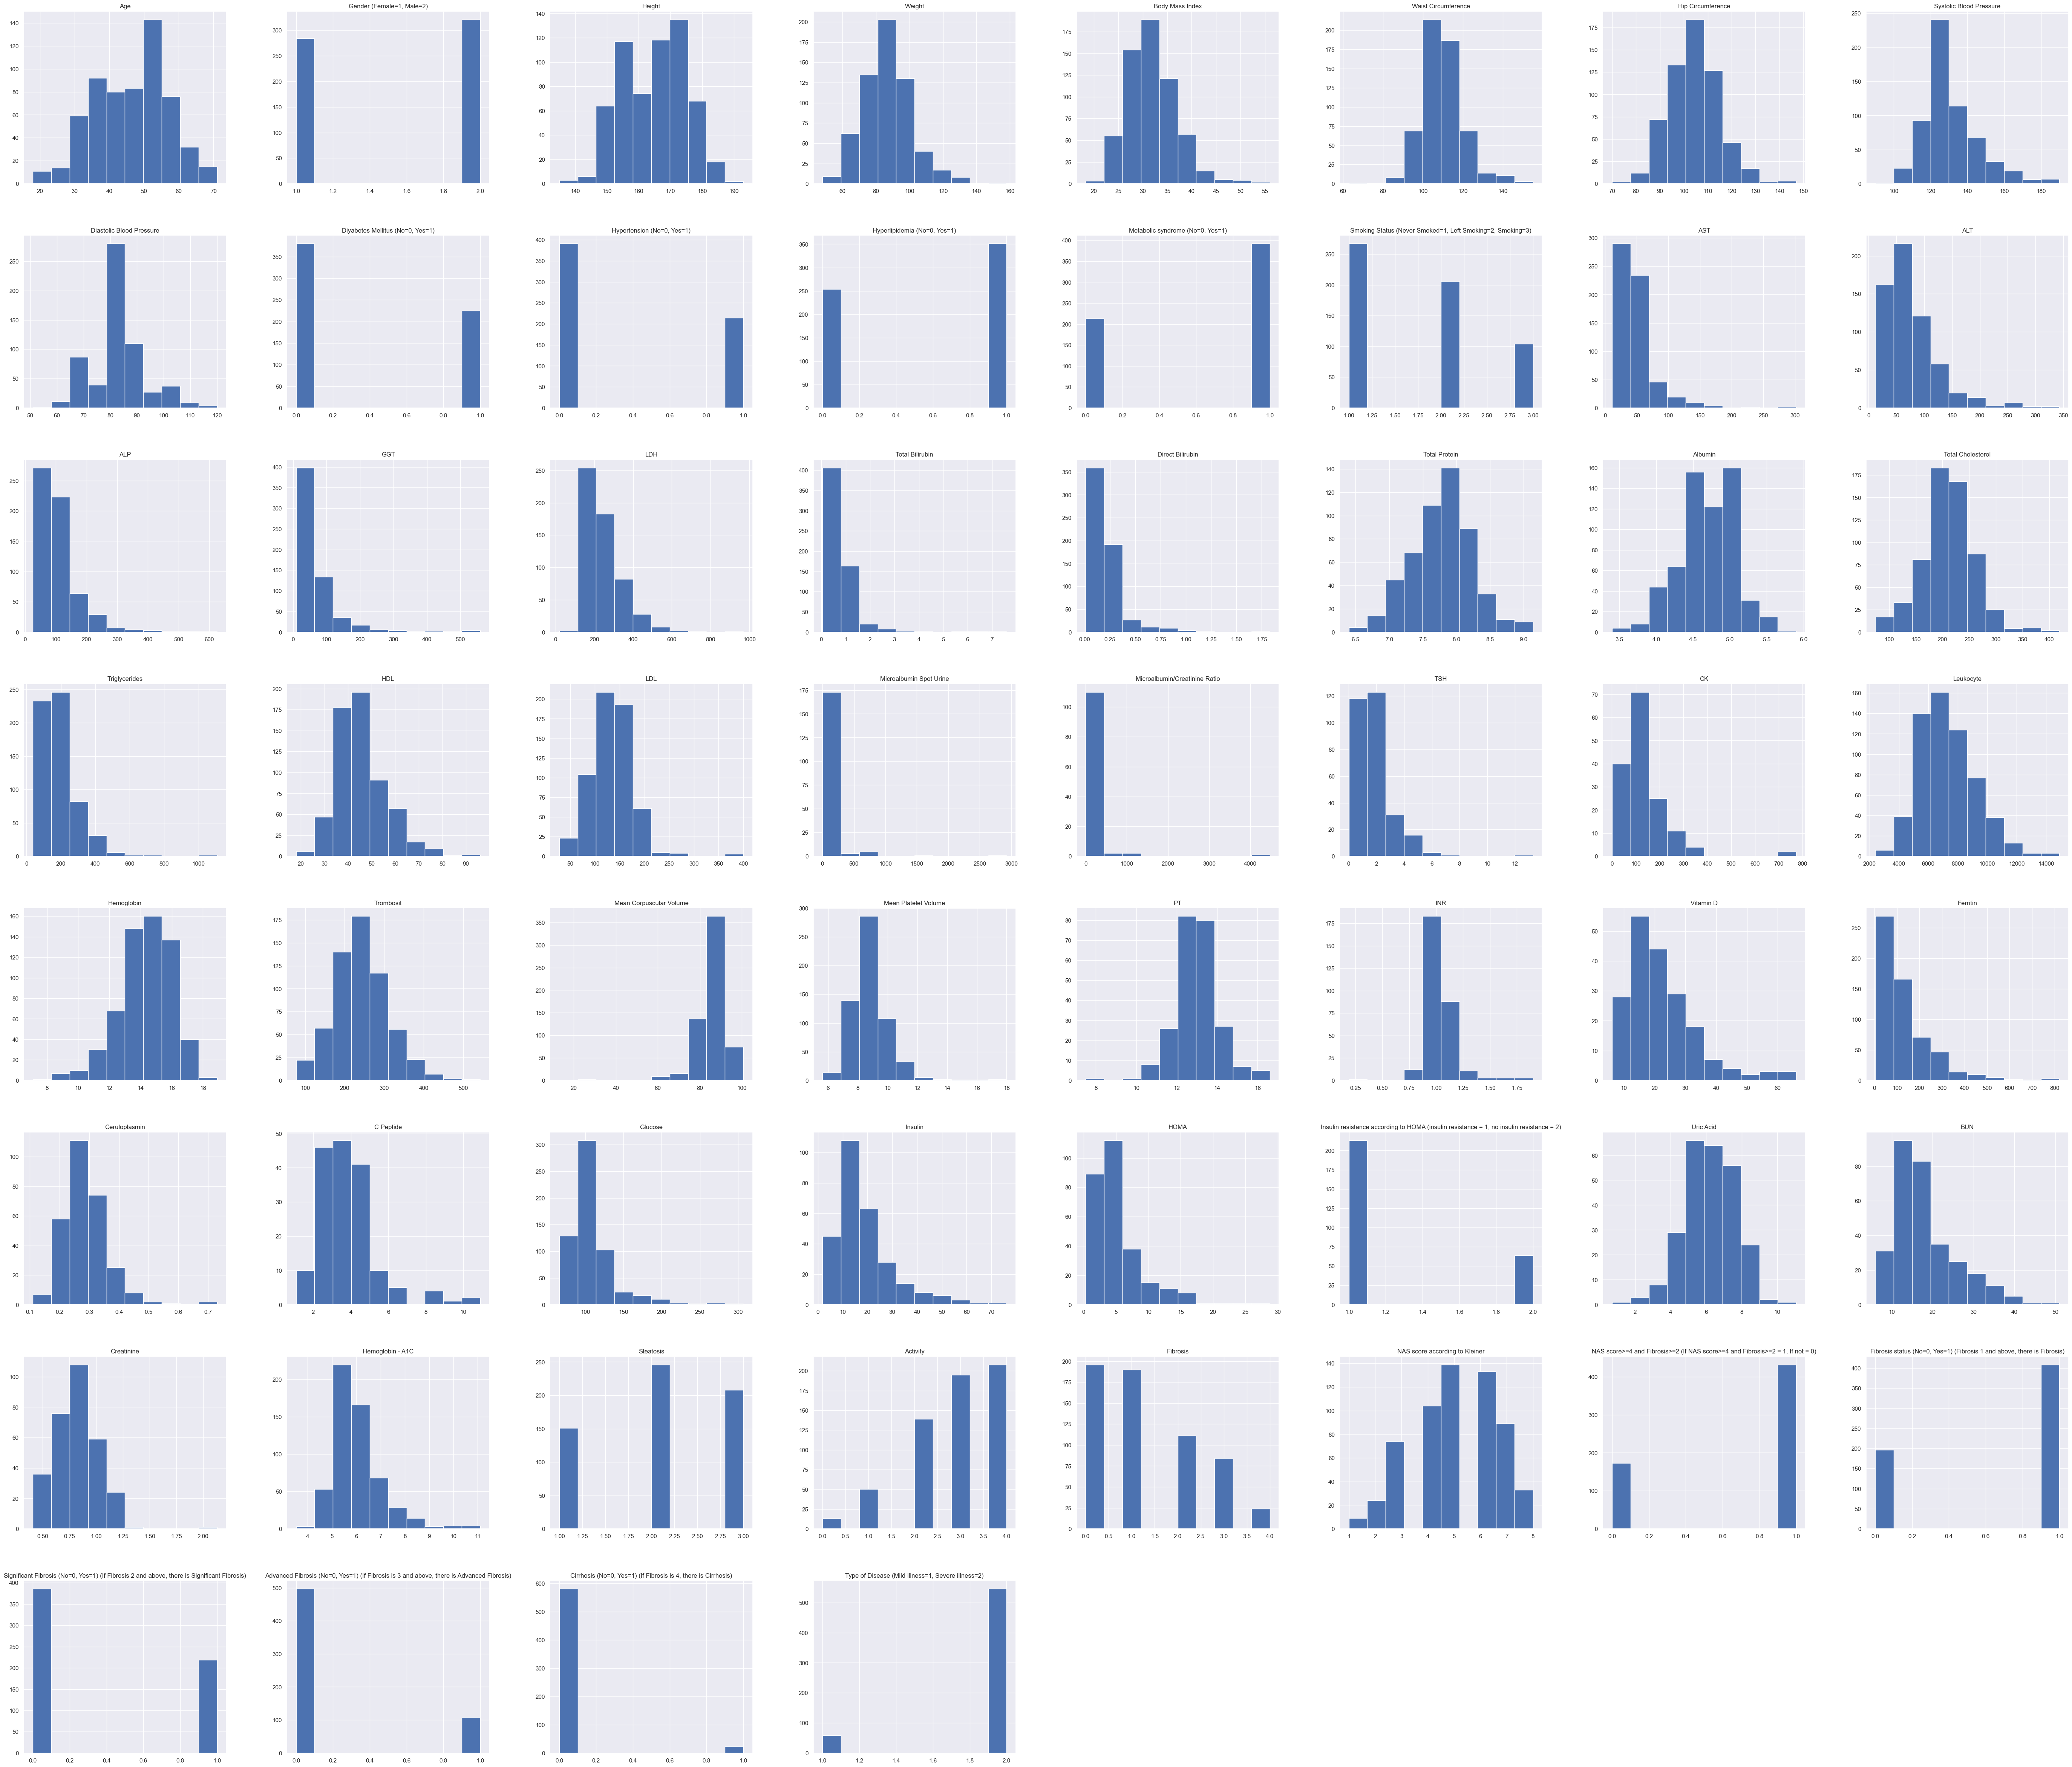

In [16]:
x.hist(figsize=(70,60))
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender (Female=1, Male=2)'),
  Text(2, 0, 'Height'),
  Text(3, 0, 'Weight'),
  Text(4, 0, 'Body Mass Index'),
  Text(5, 0, 'Waist Circumference'),
  Text(6, 0, 'Hip Circumference')])

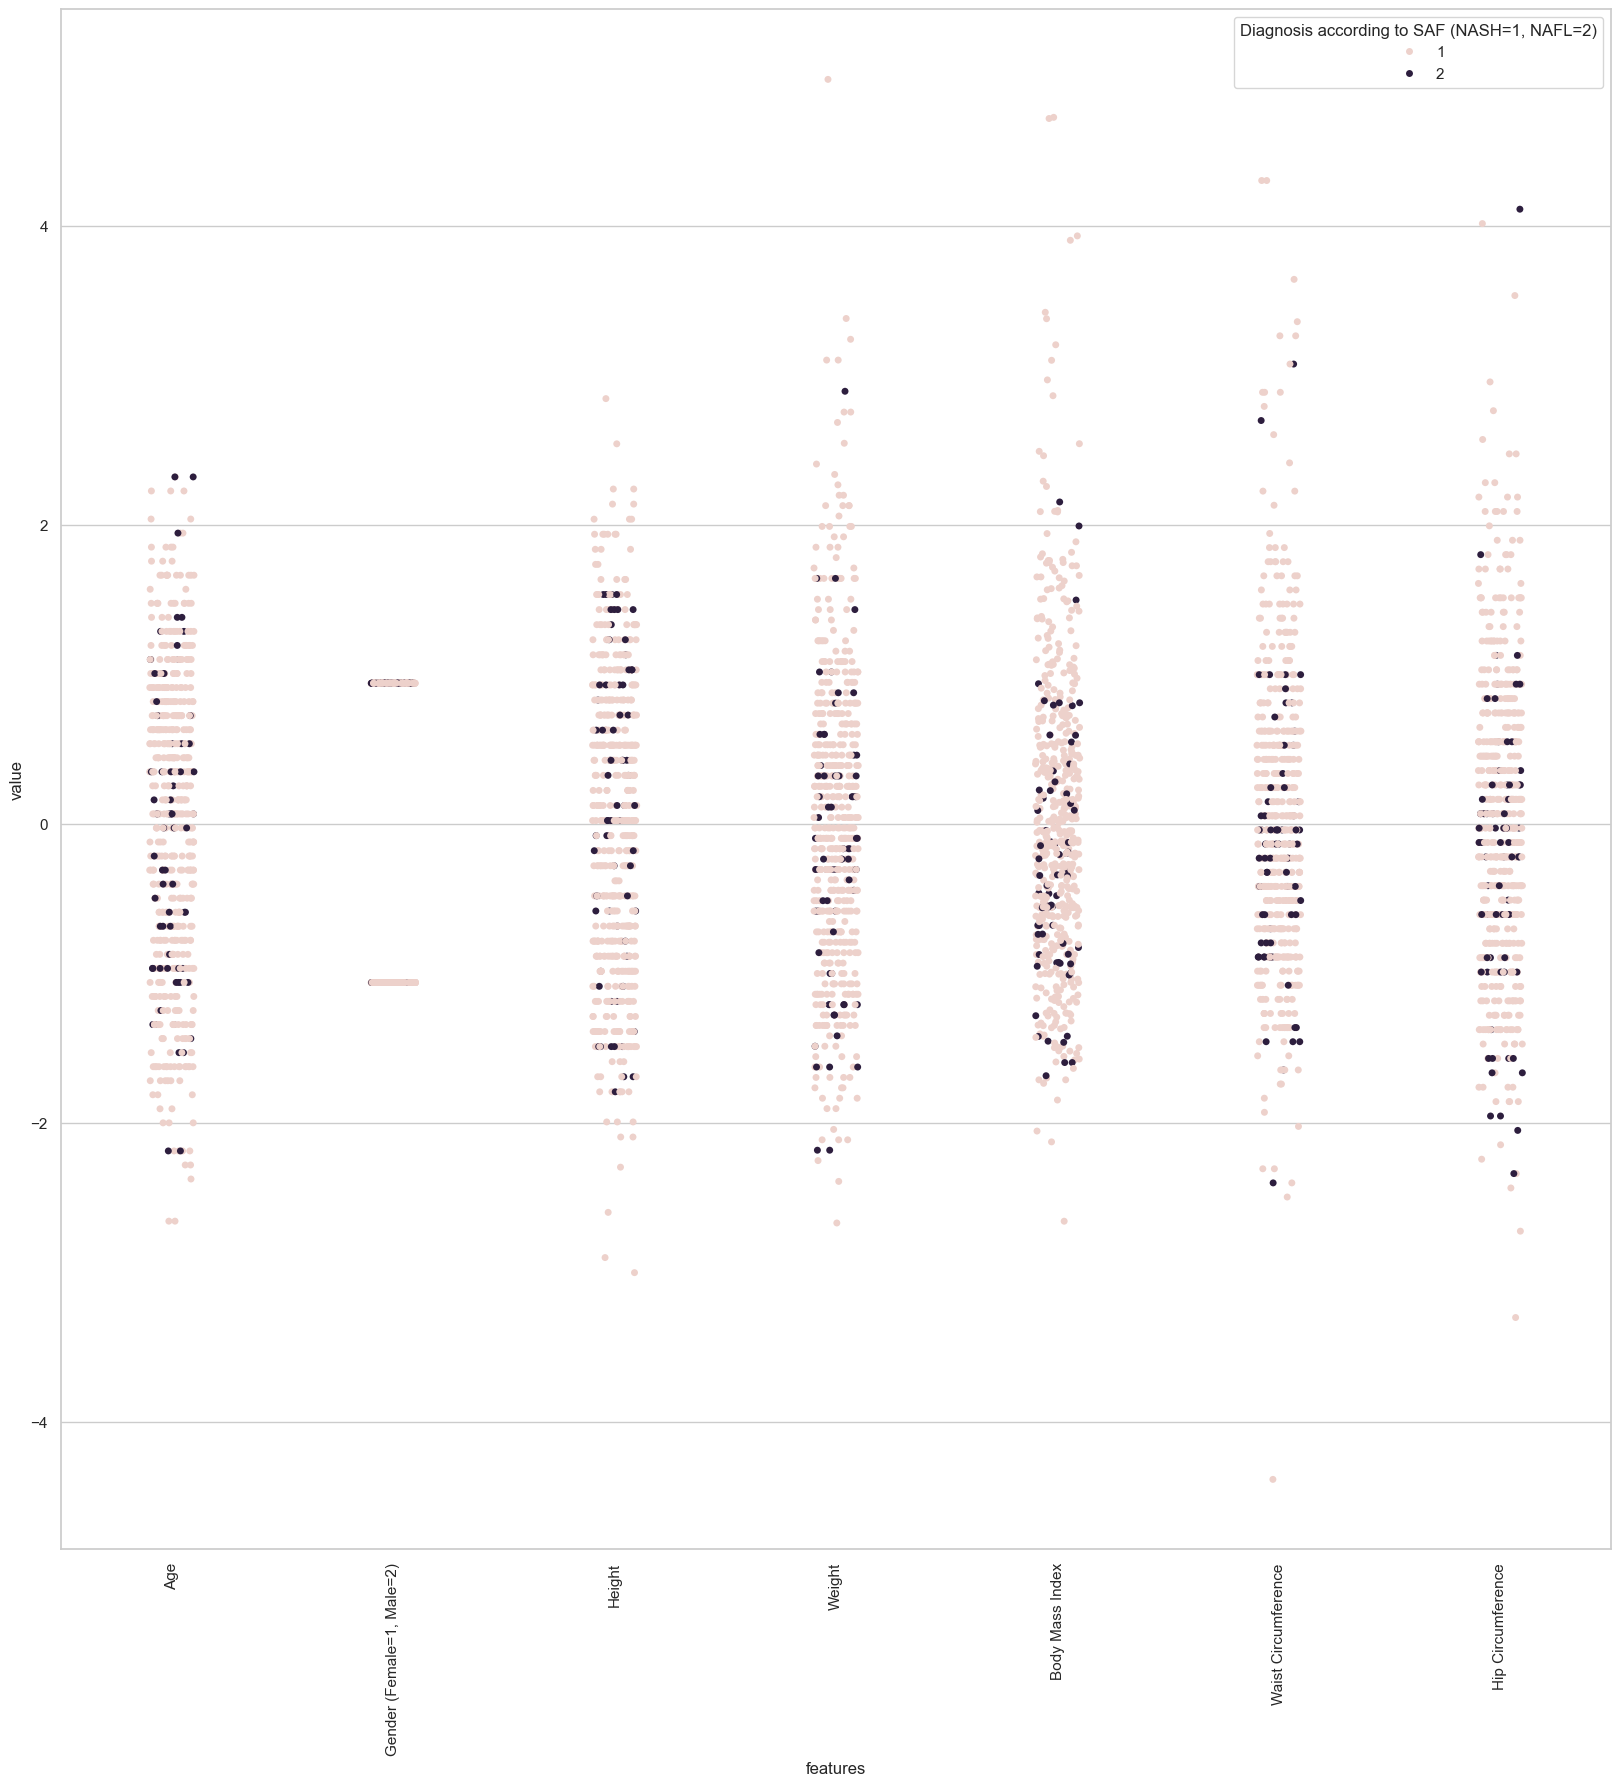

In [17]:
sns.set(style='whitegrid', palette='muted') 
df_dia = y
df = x
df_n_2 = (df - df.mean()) / (df.std()) 
df = pd.concat([y,df_n_2.iloc[:,0:7]],axis=1)
df = pd.melt(df,id_vars='Diagnosis according to SAF (NASH=1, NAFL=2)',
             var_name= 'features',
             value_name='value') 
plt.figure(figsize=(20,20)) 
tic = time.time()
sns.stripplot (x = 'features', y= "value", hue='Diagnosis according to SAF (NASH=1, NAFL=2)', data=df, jitter=True) 
plt.xticks(rotation=90) 

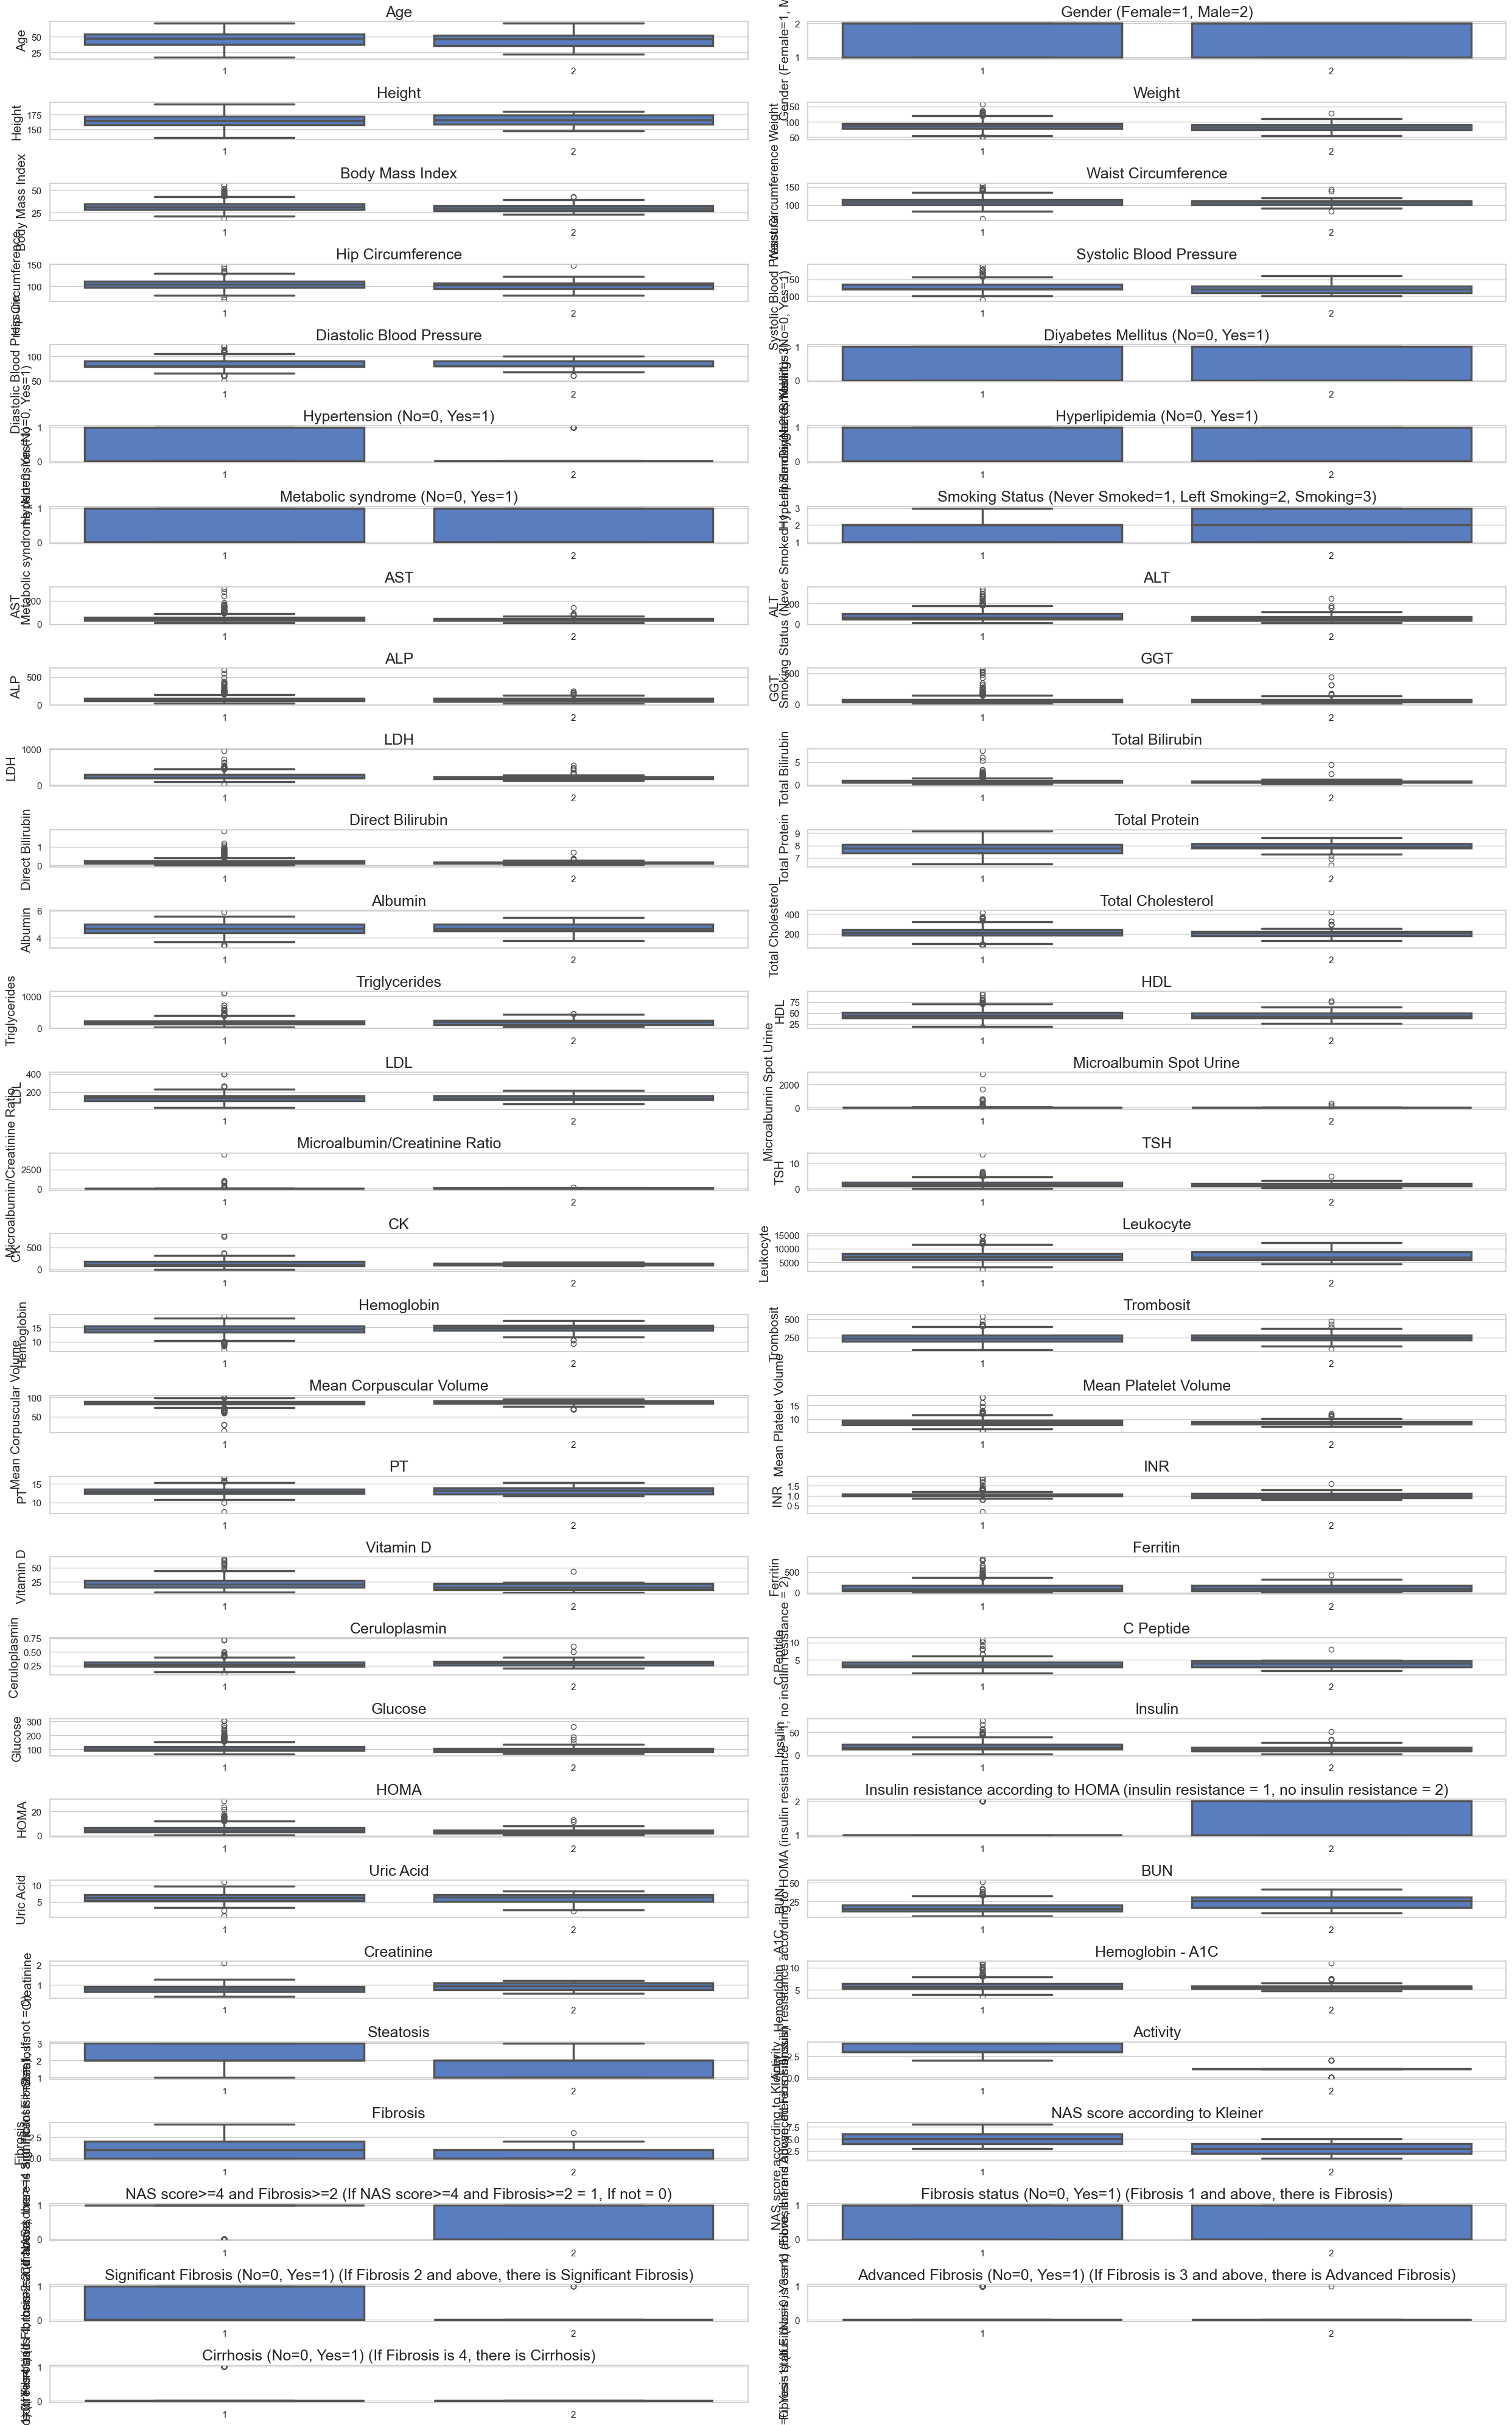

In [18]:
fig = plt.figure(figsize=(25, 40))

num_cols = len(x.columns[:-1])

rows = (num_cols // 2) + 1 if num_cols % 2 != 0 else num_cols // 2
cols = 2

for index, column in enumerate(x.columns[:-1]):
    plt.subplot(rows, cols, index + 1)
    
    sns.boxplot(y=x.loc[:, column], x=df['Diagnosis according to SAF (NASH=1, NAFL=2)'], linewidth=2.5)
    
    plt.title(column, size=18)
    
    plt.xlabel('')
       
    plt.ylabel(column, fontsize=15)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

fig.tight_layout()

plt.show()

In [19]:
x.corr

<bound method DataFrame.corr of      Age  Gender (Female=1, Male=2)  Height  Weight  Body Mass Index  \
0     60                          1     150      80            35.56   
1     55                          1     154      73            30.78   
2     53                          2     170     101            34.95   
3     33                          2     175      95            31.02   
4     23                          2     162      68            25.91   
..   ...                        ...     ...     ...              ...   
600   58                          1     150      85            37.78   
601   63                          2     186      99            28.61   
602   44                          1     159     102            40.30   
603   44                          1     159     102            40.35   
604   64                          2     173      89            29.74   

     Waist Circumference  Hip Circumference  Systolic Blood Pressure  \
0                  119.0       

<Axes: >

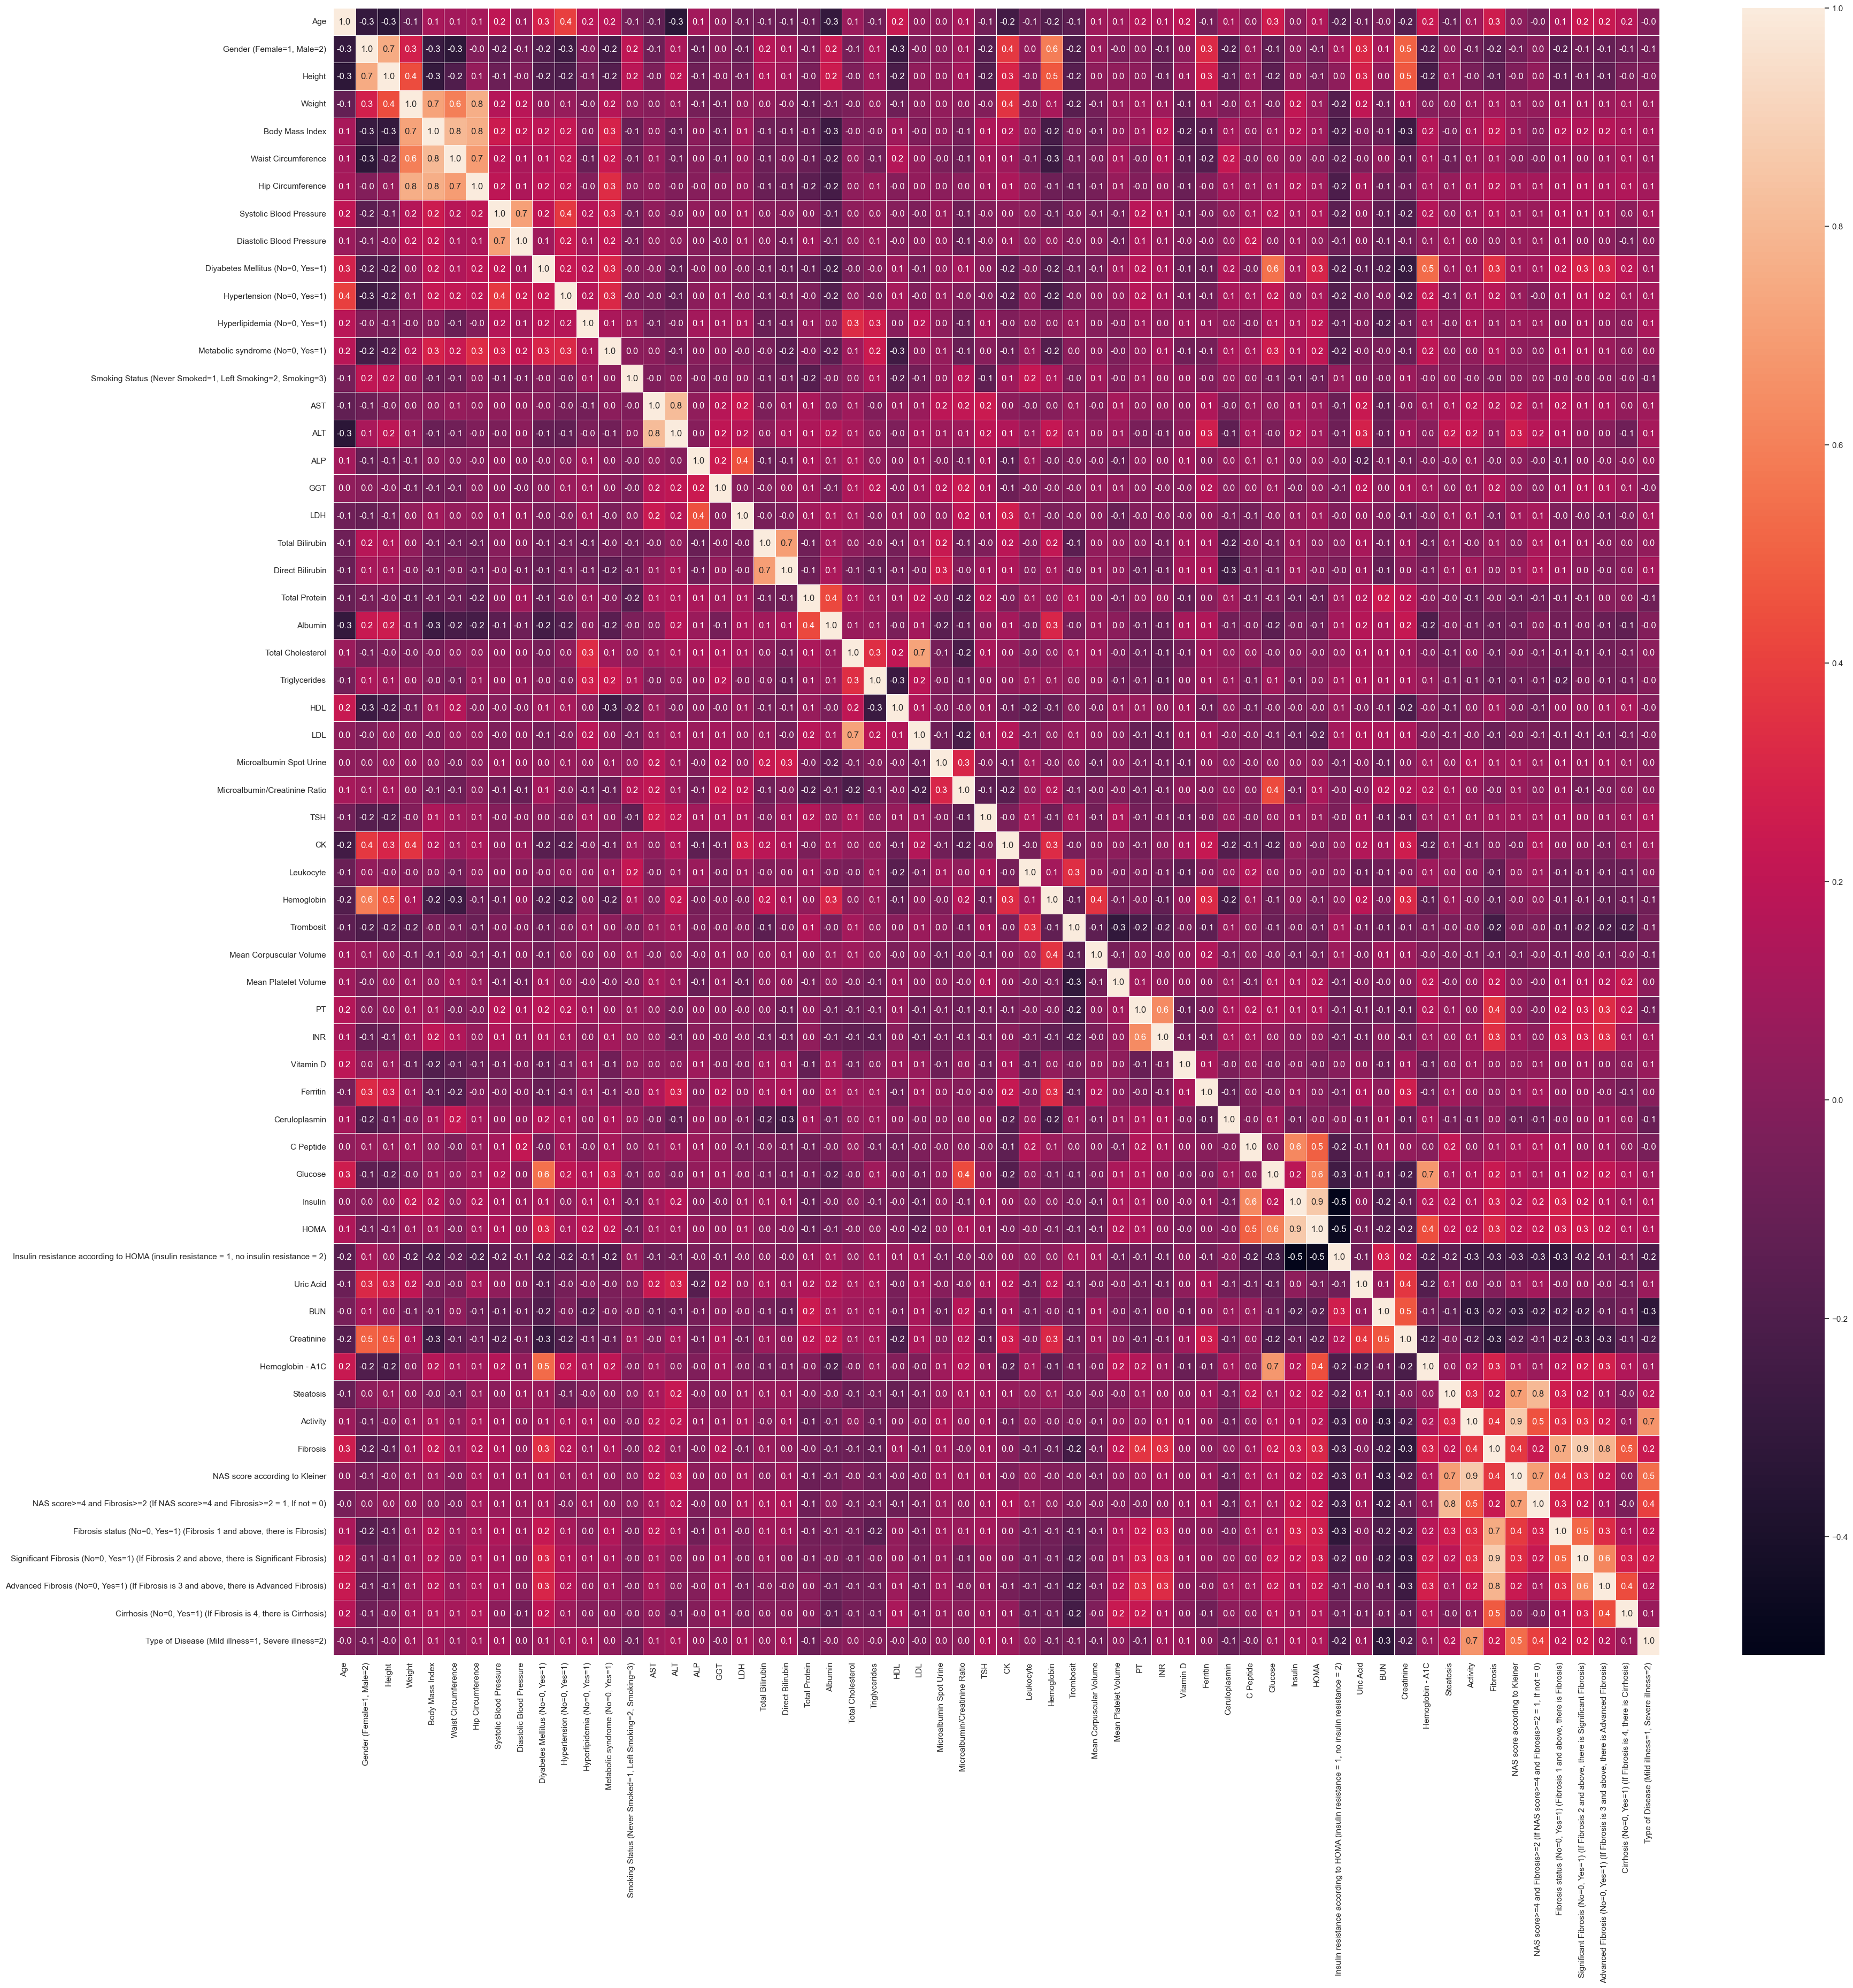

In [20]:
f,ax = plt.subplots(figsize=(40,40))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [21]:
x.isna().any().any()

True

In [22]:
missing_values = x.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns_percentage = (missing_columns / len(x)) * 100

print("Eksik Veri Durumu:")
print(missing_columns)
print(f"Eksik Verilerin Yüzdesi:\n{missing_columns_percentage}")

Eksik Veri Durumu:
Waist Circumference                                                                          29
Hip Circumference                                                                             7
Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)                                   28
ALP                                                                                           1
GGT                                                                                           3
LDH                                                                                          44
Total Bilirubin                                                                               1
Direct Bilirubin                                                                              1
Total Protein                                                                                82
Triglycerides                                                                                 1
HDL                  

In [23]:
threshold_percentage = 49 
columns_to_drop_percentage = missing_columns_percentage[missing_columns_percentage > threshold_percentage].index

columns_to_drop = set(columns_to_drop_percentage)

x = x.drop(columns=columns_to_drop)

print(f"\nSilinen sütunlar: {columns_to_drop}")
print(f"Kalan sütunlar: {x.columns}")

remaining_missing_values_after_drop = x.isnull().sum()

remaining_missing_values_after_drop_extracted = remaining_missing_values_after_drop[remaining_missing_values_after_drop > 0]

print("\nEksik veri bulunan kalan sütunlardaki eksik veri sayıları:")
print(remaining_missing_values_after_drop_extracted)


Silinen sütunlar: {'Ceruloplasmin', 'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)', 'Uric Acid', 'Microalbumin/Creatinine Ratio', 'TSH', 'Microalbumin Spot Urine', 'Vitamin D', 'Creatinine', 'C Peptide', 'BUN', 'HOMA', 'Insulin', 'PT', 'CK', 'INR'}
Kalan sütunlar: Index(['Age', 'Gender (Female=1, Male=2)', 'Height', 'Weight',
       'Body Mass Index', 'Waist Circumference', 'Hip Circumference',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Diyabetes Mellitus (No=0, Yes=1)', 'Hypertension (No=0, Yes=1)',
       'Hyperlipidemia (No=0, Yes=1)', 'Metabolic syndrome (No=0, Yes=1)',
       'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)', 'AST',
       'ALT', 'ALP', 'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'Ferr

In [24]:
columns_to_fill = ['Waist Circumference', 'Hip Circumference', 'ALP', 'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin',
                  'Total Protein', 'Triglycerides', 'HDL', 'LDL', 'Leukocyte', 'Hemoglobin', 'Trombosit', 'Ferritin', 'Glucose',
                  'Hemoglobin - A1C']

medians = x[columns_to_fill].median()

x[columns_to_fill] = x[columns_to_fill].fillna(medians)

x['Mean Corpuscular Volume'] = x['Mean Corpuscular Volume'].fillna(x['Mean Corpuscular Volume'].mean())
x['Mean Platelet Volume'] = x['Mean Platelet Volume'].fillna(x['Mean Platelet Volume'].mean())


x['Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)'] = x['Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)'].fillna(x['Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)'].mode()[0])


In [25]:
x.isna().any().any()

False

In [26]:
x.head()

Age  Gender (Female=1, Male=2)  Height  Weight  Body Mass Index  \
0   60                          1     150      80            35.56   
1   55                          1     154      73            30.78   
2   53                          2     170     101            34.95   
3   33                          2     175      95            31.02   
4   23                          2     162      68            25.91   

   Waist Circumference  Hip Circumference  Systolic Blood Pressure  \
0                119.0              104.0                      135   
1                101.0               98.0                      120   
2                116.0              112.0                      120   
3                114.0              114.0                      124   
4                101.0               97.0                      124   

   Diastolic Blood Pressure  Diyabetes Mellitus (No=0, Yes=1)  ...  Steatosis  \
0                        77                                 0  ...          2   
1                        72                                 0  ...          2   
2                        80                                 1  ...          2   
3                        83                                 1  ...          2   
4                        79                                 0  ...          2   

   Activity  Fibrosis  NAS score according to Kleiner  \
0         2         1                               4   
1         2         0                               4   
2         2         3                               4   
3         2         1                               4   
4         2         0                               4   

   NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)  \
0                                                  1                                
1                                                  1                                
2                                                  1                                
3                                                  1                                
4                                                  1                                

   Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)  \
0                                                  1                         
1                                                  0                         
2                                                  1                         
3                                                  1                         
4                                                  0                         

   Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)  \
0                                                  0                                             
1                                                  0                                             
2                                                  1                                             
3                                                  0                                             
4                                                  0                                             

   Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)  \
0                                                  0                                          
1                                                  0                                          
2                                                  1                                          
3                                                  0                                          
4                                                  0                                          

   Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)  \
0                                                  0                
1                                                  0 

In [27]:
categorical_features = [
        'Gender (Female=1, Male=2)', 
        'Diyabetes Mellitus (No=0, Yes=1)',
        'Hypertension (No=0, Yes=1)',
        'Hyperlipidemia (No=0, Yes=1)',
        'Metabolic syndrome (No=0, Yes=1)',
        'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)',
        'NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)',
        'Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)',
        'Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)',
        'Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)',
        'Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)'
]
x = pd.get_dummies(x, columns=categorical_features)

x.head()

Age  Height  Weight  Body Mass Index  Waist Circumference  \
0   60     150      80            35.56                119.0   
1   55     154      73            30.78                101.0   
2   53     170     101            34.95                116.0   
3   33     175      95            31.02                114.0   
4   23     162      68            25.91                101.0   

   Hip Circumference  Systolic Blood Pressure  Diastolic Blood Pressure   AST  \
0              104.0                      135                        77  27.0   
1               98.0                      120                        72  17.0   
2              112.0                      120                        80  51.0   
3              114.0                      124                        83  31.0   
4               97.0                      124                        79  32.0   

   ALT  ...  \
0   49  ...   
1   18  ...   
2   74  ...   
3   72  ...   
4   51  ...   

   NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)_0  \
0                                              False                                  
1                                              False                                  
2                                              False                                  
3                                              False                                  
4                                              False                                  

   NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)_1  \
0                                               True                                  
1                                               True                                  
2                                               True                                  
3                                               True                                  
4                                               True                                  

   Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)_0  \
0                                              False                           
1                                               True                           
2                                              False                           
3                                              False                           
4                                               True                           

   Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)_1  \
0                                               True                           
1                                              False                           
2                                               True                           
3                                               True                           
4                                              False                           

   Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)_0  \
0                                               True                                               
1                                               True                                               
2                                              False                                               
3                                               True                                               
4                                               True                                               

   Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)_1  \
0                                              False                                               
1                                              False                                               
2                                               True                                               
3                              

In [28]:
x = x.astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [30]:
print('X_train =', X_train.shape)
print('y_train =', y_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)

X_train = (423, 57)
y_train = (423,)
X_test = (182, 57)
y_test = (182,)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

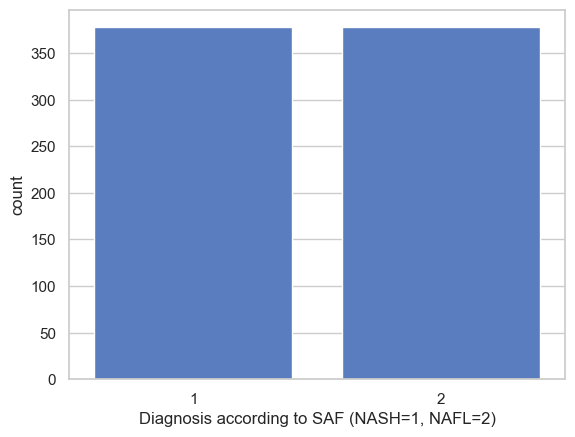

In [33]:
sns.countplot(x=y_train)
plt.show()

In [34]:
y_train = y_train.replace(1, 0)
y_train = y_train.replace(2, 1)

y_test = y_test.replace(1, 0)
y_test = y_test.replace(2, 1)

In [35]:
models = [
    ('Support Vector Classifier', SVC(probability=True)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

results = []
confusion_matrices = []
classification_reports = []
mcc_scores = []  
roc_aucs = []  
kappa_scores = []  


for model_name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = cv_results.mean()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred) 
    kappa = cohen_kappa_score(y_test, y_pred)  

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr) 

    results.append((model_name, mean_accuracy, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))
    mcc_scores.append((model_name, mcc))  
    roc_aucs.append((model_name, roc_auc))  
    kappa_scores.append((model_name, kappa))  

df_results = pd.DataFrame(results, columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy'])
df_results['MCC'] = [mcc for _, mcc in mcc_scores]  
df_results['ROC AUC'] = [roc_auc for _, roc_auc in roc_aucs]  
df_results['Kappa'] = [kappa for _, kappa in kappa_scores]  
df_results.sort_values('Cross-Validation Accuracy', ascending=False, inplace=True)

print(df_results.to_string(index=False))

                    Model  Cross-Validation Accuracy  Test Accuracy      MCC  ROC AUC    Kappa
Support Vector Classifier                   0.997360       0.989011 0.949580 0.993437 0.948310
            Random Forest                   0.993404       0.994505 0.974958 0.995488 0.974645
            Decision Tree                   0.985457       0.972527 0.884368 0.965682 0.882155


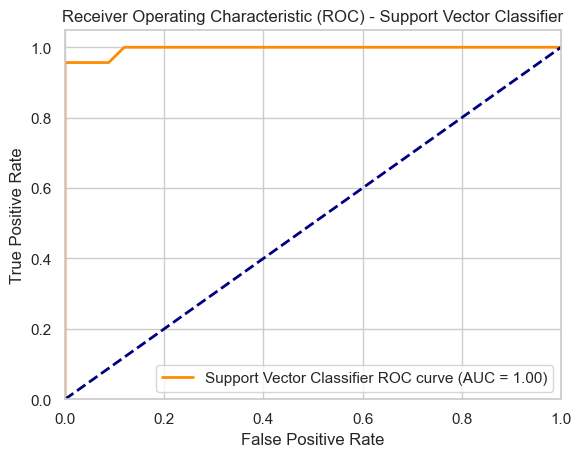

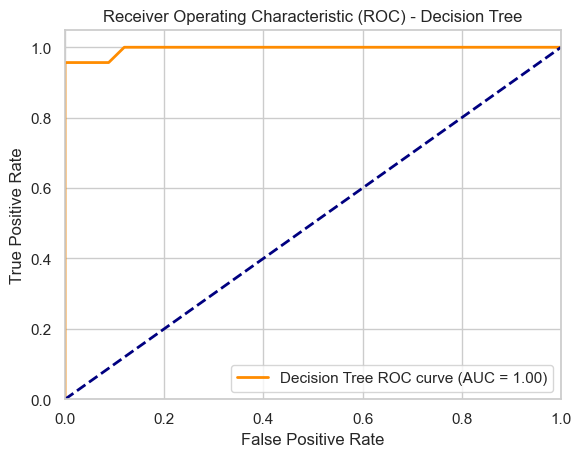

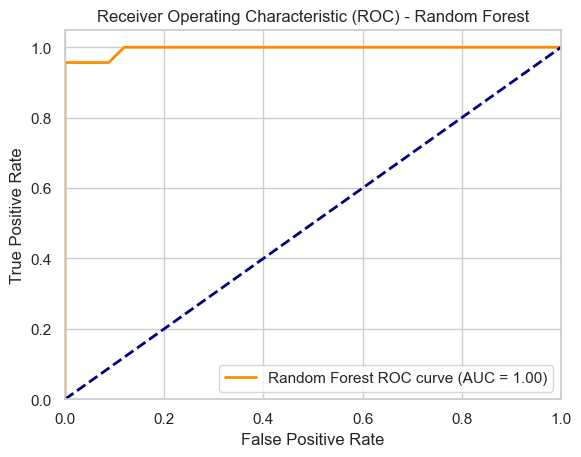

In [36]:
for model_name, _ in models:
    
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

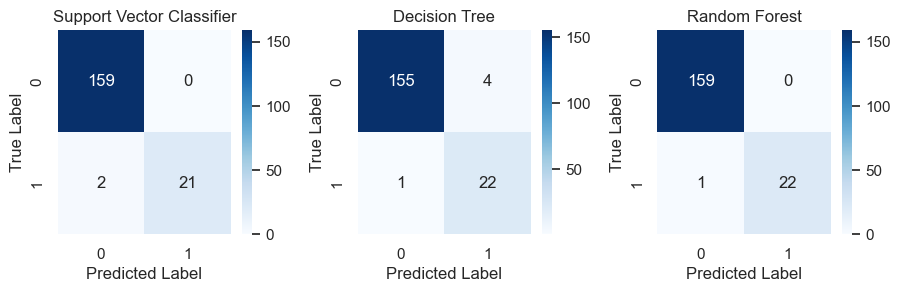

In [37]:
plt.figure(figsize=(12, 8))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(3, 4, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [38]:
for model_name, cr in classification_reports:
    print(f'\033[1m{model_name}:\033[0m')
    print(f'\033[1mClassification Report:\033[0m')
    print(cr)
    
    
    mcc_value = next(mcc for model, mcc in mcc_scores if model == model_name)
    print(f'\033[1mMCC:\033[0m {mcc_value:.4f}')
    
    
    roc_auc_value = next(roc_auc for model, roc_auc in roc_aucs if model == model_name)
    print(f'\033[1mROC AUC:\033[0m {roc_auc_value:.4f}')
    
    
    kappa_value = next(kappa for model, kappa in kappa_scores if model == model_name)
    print(f'\033[1mKappa:\033[0m {kappa_value:.4f}')
    
    print('-'*60)

Support Vector Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       159
           1       1.00      0.91      0.95        23

    accuracy                           0.99       182
   macro avg       0.99      0.96      0.97       182
weighted avg       0.99      0.99      0.99       182

MCC: 0.9496
ROC AUC: 0.9934
Kappa: 0.9483
------------------------------------------------------------
Decision Tree:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.85      0.96      0.90        23

    accuracy                           0.97       182
   macro avg       0.92      0.97      0.94       182
weighted avg       0.97      0.97      0.97       182

MCC: 0.8844
ROC AUC: 0.9657
Kappa: 0.8822
------------------------------------------------------------
Random Forest:
Classification Report:
              